In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
my_out = pd.read_csv("my_out.csv")
my_out.head()
my_out['date'] = pd.to_datetime(my_out['date'])

In [2]:
len_myout = len(my_out)
pos_num = 0
neg_num = 0
temp =[]
diff = []
max_num = 0
index = 0

for i in range(len_myout):
    if my_out['pos'][i] >= my_out['neg'][i]:
        temp.append(1)
        pos_num = pos_num + 1
    else:
        temp.append(-1)
        neg_num = neg_num + 1
    temp_diff = my_out['pos'][i] - my_out['neg'][i]
    if temp_diff > 500000:
        temp_diff = diff[-1]
    diff.append(temp_diff)
    
        
my_out['pos_or_neg'] = temp
my_out['diff'] = diff




# plt.title('stock price')
# plt.xlabel('time [days]')
# plt.ylabel('price')
        

In [3]:
fuxing_price = pd.read_csv("复星医药股价.csv",parse_dates = [0])

In [4]:
fuxing_price.head()

,date,open,close,high,low,volume,money
0,2020-05-25,30.91,31.12,31.52,30.78,20599861,641229708.1
1,2020-05-26,31.33,31.33,31.66,31.16,18963313,594364389.7
2,2020-05-27,31.37,30.80,31.47,30.37,27555024,848653851.8
3,2020-05-28,30.68,30.11,31.03,29.75,30655938,926706632.6
4,2020-05-29,30.15,30.54,30.74,30.12,23890232,728447291.5


In [5]:
temp2 = [0]
up_num = 0
down_num = 0
price_diff = [0]
for i in range(1,len(fuxing_price)):
    if fuxing_price['close'][i] >  fuxing_price['close'][i-1]:
        temp2.append(1)
        up_num = up_num + 1
    else:
        temp2.append(-1)
        down_num = down_num + 1
    price_diff.append(fuxing_price['close'][i]  - fuxing_price['close'][i-1])
fuxing_price['change'] = temp2
fuxing_price['price_diff'] = price_diff
fuxing_price.head()
len_fuxing = len(fuxing_price)



In [6]:
final = pd.merge(fuxing_price,my_out,left_on='date',right_on='date')


In [7]:
len_final = len(final)


In [8]:
final.head()

,date,open,close,high,low,volume,money,change,price_diff,pos,neg,pos_or_neg,diff
0,2020-05-25,30.91,31.12,31.52,30.78,20599861,6.412297e+08,0,0.00,60452.0,0.0,1,60452.0
1,2020-05-26,31.33,31.33,31.66,31.16,18963313,5.943644e+08,1,0.21,0.0,0.0,1,0.0
2,2020-06-01,30.98,31.07,31.22,30.79,25269456,7.845067e+08,1,0.53,0.0,0.0,1,0.0
3,2020-06-12,31.38,32.77,33.27,31.37,51757990,1.685759e+09,1,0.89,0.0,0.0,1,0.0
4,2020-06-18,34.51,33.44,34.51,33.38,47403277,1.598634e+09,-1,-1.16,0.0,0.0,1,0.0


0.5412371134020618

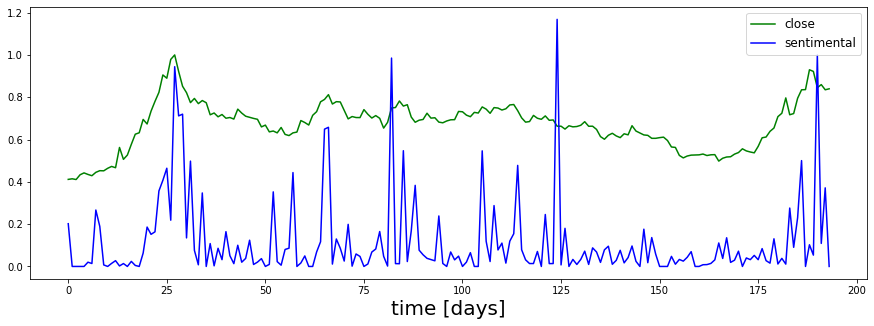

In [9]:
count = 0
for i in range(len_final):
    if final['change'][i] == final['pos_or_neg'][i]:
        count = count + 1
rate = count/ len_final



# plt.subplot(1,2,1);
# plt.plot(final['price_diff'])
# plt.subplot(1,2,2);
# plt.plot(final['diff'])

final['diff'] = abs(final['diff']/max(final['diff']))
final['close'] = abs(final['close']/max(final['close']))

plt.figure(figsize=(15, 5));
plt.plot(final['close'].values, color='green', label='close')
plt.plot(final['diff'].values, color='blue', label='sentimental')
# plt.title('close  VS  sentimental difference', fontsize=20)
plt.xlabel('time [days]', fontsize=20)
plt.legend(loc='best', fontsize=12)

rate